<a href="https://colab.research.google.com/github/Mund99/Medium_Writing/blob/main/loan_calculator/loan_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [ ]:
# Get loan parameters from user input
total_loan = float(input("Enter the total loan amount: "))
tenure_yr = int(input("Enter the loan tenure in years: "))
interest_rate = float(input("Enter the interest rate (p.a.): "))

# Display entered loan parameters
print("\nLoan Parameters:")
print(f"Total Loan Amount: {total_loan}")
print(f"Loan Tenure: {tenure_yr} years")
print(f"Annual Interest Rate: {interest_rate}%")

In [ ]:
# Calculate derived values
tenure_mth = tenure_yr * 12
total_interest = (interest_rate / 100) * total_loan * tenure_yr
total_repayment = total_loan + total_interest
yearly_interest = total_interest / tenure_yr
monthly_interest = yearly_interest / 12
monthly_installment = (total_loan + total_interest) / tenure_mth

In [ ]:
# Print loan details
print(f"Loan Details:")
print(f"Principal Amount: \t${total_loan:,.2f}")
print(f"Interest Rate: \t\t{interest_rate}%")
print(f"Loan Tenure: \t\t{tenure_yr} years ({tenure_mth} months)\n")

# Print financial summary
print(f"Financial Summary:")
print(f"Total Repayment: \t${total_repayment:,.2f}")
print(f"Total Interest: \t${total_interest:,.2f}\n")
print(f"Yearly Interest: \t${yearly_interest:,.2f}")
print(f"Monthly Interest: \t${monthly_interest:,.2f}")
print(f"Monthly Installment: \t${monthly_installment:,.2f}")

Loan Details:
Principal Amount: 	$600,000.00
Interest Rate: 		3.0%
Loan Tenure: 		30 years (360 months)

Financial Summary:
Total Repayment: 	$1,140,000.00
Total Interest: 	$540,000.00

Yearly Interest: 	$18,000.00
Monthly Interest: 	$1,500.00
Monthly Installment: 	$3,166.67


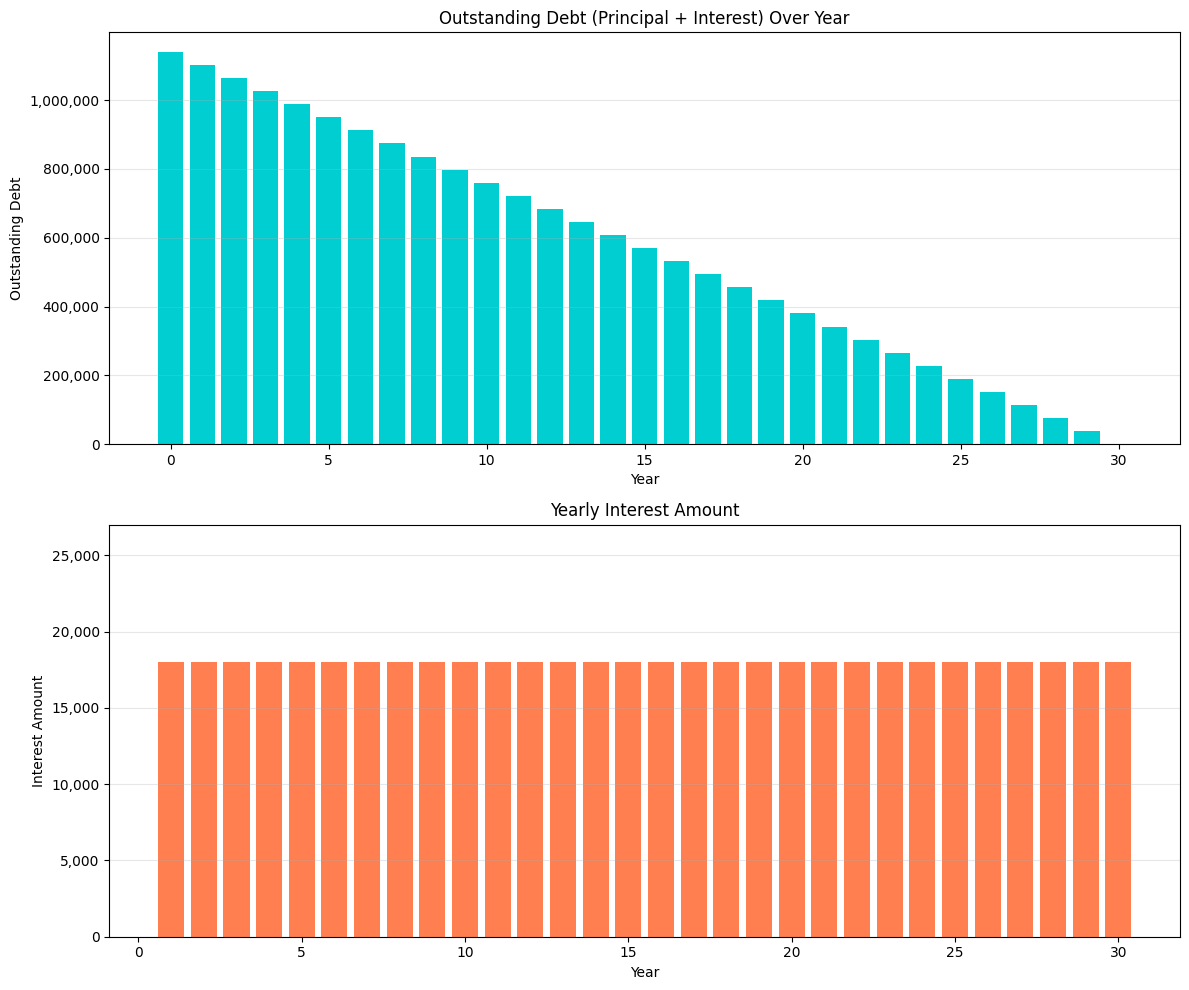

In [ ]:
# Calculate debt for each year
years = np.arange(0, tenure_yr + 1)
debt_per_year = []

for year in years:
    debt = total_repayment - monthly_installment * 12 * year
    debt_per_year.append(debt if debt > 0 else 0)

# Calculate interest per year
interest_per_year = [yearly_interest] * tenure_yr

# Plotting the bar chart
plt.figure(figsize=(12, 10))

# Plotting chart 1: Debt vs Year
plt.subplot(2, 1, 1)
plt.bar(years, debt_per_year, color='darkturquoise')
plt.title('Outstanding Debt (Principal + Interest) Over Year')
plt.xlabel('Year')
plt.ylabel('Outstanding Debt')
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Plotting chart 2: Yearly Interest Amount vs Year (Flat)
plt.subplot(2, 1, 2)
plt.bar(years[1:], interest_per_year, color='coral')
plt.title('Yearly Interest Amount')
plt.xlabel('Year')
plt.ylabel('Interest Amount')
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.ylim(bottom=0, top=max(interest_per_year) * 1.5)

plt.tight_layout()

plt.show()

In [ ]:
def calculate_eir_guess_balance(eir_guess, total_loan, monthly_installment, tenure_yr):
    """
    Calculate the remaining balance based on the guessed Effective Interest Rate (EIR).

    Parameters:
    - eir_guess (float): Guessed Effective Interest Rate.
    - total_loan (float): Total loan amount.
    - monthly_installment (float): Monthly installment.
    - tenure_mth (int): Total number of months in the loan tenure.

    Returns:
    float: Remaining balance based on the guessed EIR.
    """
    interest_balance = total_loan
    for _ in range(tenure_yr*12):
        interest = interest_balance * eir_guess / 12
        interest_balance = interest_balance + interest - monthly_installment
    return interest_balance

def find_effective_interest_rate(total_loan, monthly_installment, tenure_yr, tolerance=0.00000001, max_iterations=10000):
    """
    Find the Effective Interest Rate (EIR) using an iterative method.

    Parameters:
    - total_loan (float): Total loan amount.
    - monthly_installment (float): Monthly installment.
    - tenure_yr (int): Loan tenure in years.
    - tolerance (float): Tolerance level for convergence.
    - max_iterations (int): Maximum number of iterations.

    Returns:
    float or None: Found EIR or None if convergence fails within the specified iterations.
    """
    eir_guess = interest_rate / 100
    eir_guess_balance = total_loan
    iterations = 0

    while iterations < max_iterations:
        eir_guess_balance = calculate_eir_guess_balance(eir_guess, total_loan, monthly_installment, tenure_yr)

        # Adjust guessed EIR based on the balance
        increment_factor = min(1.0, abs(eir_guess_balance) / total_loan)
        increment = 0.01 * increment_factor

        if eir_guess_balance < 0:
            eir_guess += increment
        else:
            eir_guess -= increment

        if abs(eir_guess_balance) <= tolerance:
            # print(f"Found EIR: {(eir_guess*100):.2f}% after {iterations + 1} iterations.")
            return eir_guess

        iterations += 1

    # print("Failed to converge.")
    return None

In [ ]:
# To find the EIR
effective_interest_rate = find_effective_interest_rate(total_loan, monthly_installment, tenure_yr)

if effective_interest_rate is not None:
    print(f"Effective Interest Rate Found: {effective_interest_rate*100:.2f}%")
else:
    print("Failed to calculate Effective Interest Rate.")

Effective Interest Rate Found: 4.85%


In [ ]:
# Convert to monthly EIR
monthly_interest_rate = effective_interest_rate / 12

# Find the monthly interest cost
months = np.arange(1, tenure_yr * 12 + 1)
interest_per_year = []
balance = total_loan
interest_accumulated = 0

# Record the interest per year
for i in months:
    # Calculate interest for the month
    interest = balance * monthly_interest_rate

    # Calculate new outstanding debt after payment
    debt = balance + interest
    balance = debt - monthly_installment

    interest_accumulated += interest

    # Record yearly interest
    if i % 12 == 0:
        interest_per_year.append(interest_accumulated)
        interest_accumulated = 0  # Reset accumulated interest for the next year

total_interest = sum(interest_per_year)

# Calculate outstanding debt over the years
outstanding_debt = total_loan + total_interest
yearly_installment = monthly_installment * 12
debt_per_year = [total_repayment]

for i in range(1, tenure_yr + 1):
    outstanding_debt -= yearly_installment
    debt_per_year.append(outstanding_debt)

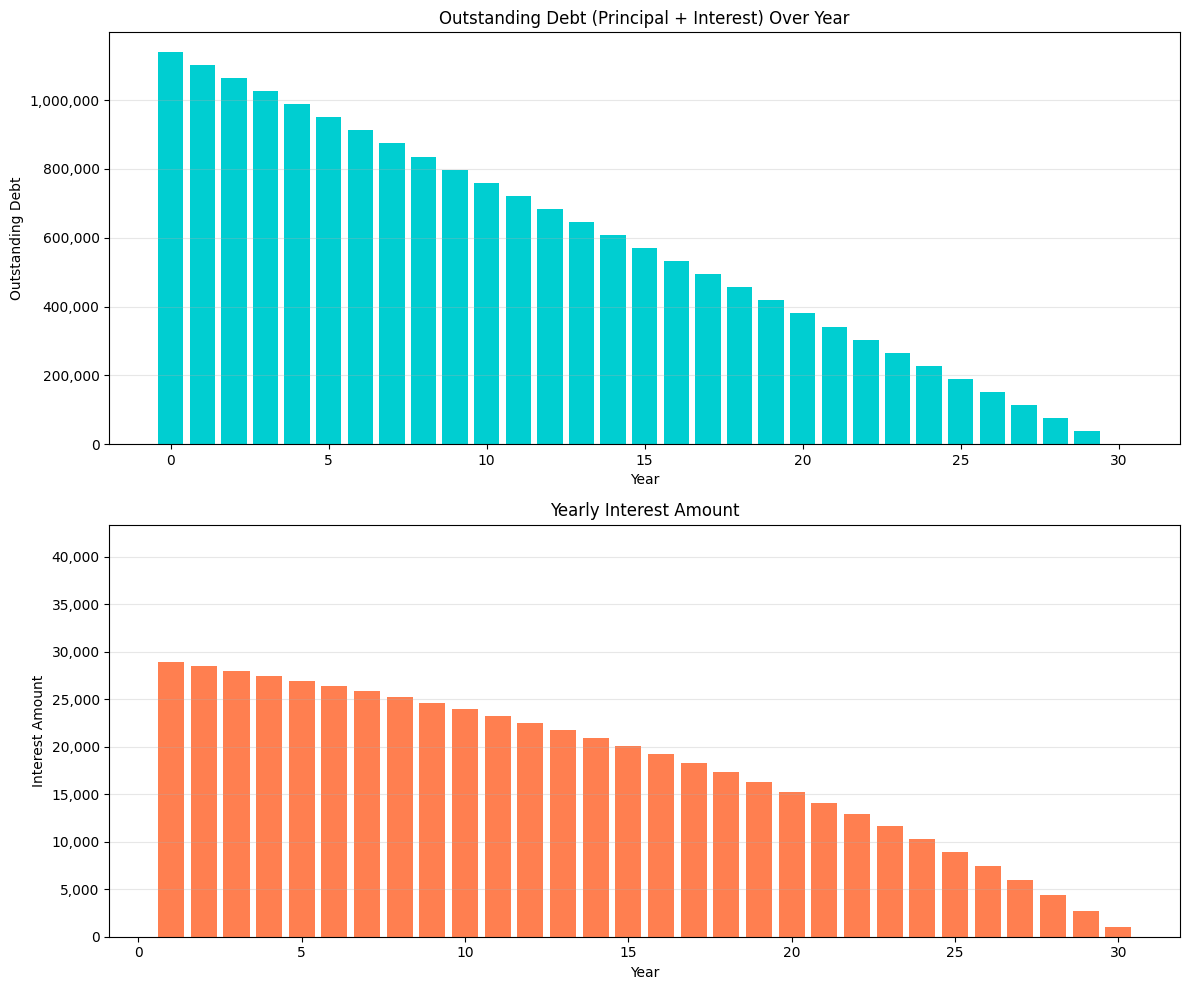

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 10))

# Plotting chart 1: Debt vs Year
plt.subplot(2, 1, 1)
plt.bar(years, debt_per_year, color='darkturquoise')
plt.title('Outstanding Debt (Principal + Interest) Over Year')
plt.xlabel('Year')
plt.ylabel('Outstanding Debt')
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Plotting chart 2: Yearly Interest Amount vs Year (Flat)
plt.subplot(2, 1, 2)
plt.bar(years[1:], interest_per_year, color='coral')
plt.title('Yearly Interest Amount')
plt.xlabel('Year')
plt.ylabel('Interest Amount')
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.ylim(bottom=0, top=max(interest_per_year) * 1.5)

plt.tight_layout()

plt.show()